### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

### 1. Data Acquisition

In [2]:
df = pd.read_csv("data/ActiveCases.csv")

In [3]:
df.head(5)

,State,Date,Region,Active Cases
0,Perlis,26/9/2020,Perlis,0
1,Perlis,27/9/2020,Perlis,0
2,Perlis,28/9/2020,Perlis,0
3,Perlis,29/9/2020,Perlis,0
4,Perlis,30/9/2020,Perlis,0


### 2. Data Cleaning and Preprocessing

Create "Month" column from "Date".

In [4]:
def get_month(date):
    return date.split("/")[1]

df["Month"] = df["Date"].apply(lambda x: f"{get_month(x)}")

In [5]:
df.head(5)

,State,Date,Region,Active Cases,Month
0,Perlis,26/9/2020,Perlis,0,9
1,Perlis,27/9/2020,Perlis,0,9
2,Perlis,28/9/2020,Perlis,0,9
3,Perlis,29/9/2020,Perlis,0,9
4,Perlis,30/9/2020,Perlis,0,9


In [6]:
# Rearrange columns.
cols = df.columns.tolist()
cols

['State', 'Date', 'Region', 'Active Cases', 'Month']

In [7]:
cols = df.columns.tolist()
cols = cols[:2] + cols[-1:] + cols [2:-1]
cols

['State', 'Date', 'Month', 'Region', 'Active Cases']

In [8]:
df = df[cols]
df.head(5)

,State,Date,Month,Region,Active Cases
0,Perlis,26/9/2020,9,Perlis,0
1,Perlis,27/9/2020,9,Perlis,0
2,Perlis,28/9/2020,9,Perlis,0
3,Perlis,29/9/2020,9,Perlis,0
4,Perlis,30/9/2020,9,Perlis,0


Create "Year" column from "Date".

In [9]:
def get_month(year):
    return year.split("/")[2]

df["Year"] = df["Date"].apply(lambda x: f"{get_month(x)}")

In [10]:
df.tail(100)

,State,Date,Month,Region,Active Cases,Year
8546,Sarawak,22/11/2020,11,Bintulu,0,2020
8547,Sarawak,22/11/2020,11,Mukah,0,2020
8548,Sarawak,22/11/2020,11,Sibu,0,2020
8549,Sarawak,22/11/2020,11,Sarikei,0,2020
8550,Sarawak,23/11/2020,11,Bentong,0,2020
...,...,...,...,...,...,...
8641,Sarawak,30/11/2020,11,Limbang,0,2020
8642,Sarawak,30/11/2020,11,Bintulu,0,2020
8643,Sarawak,30/11/2020,11,Mukah,0,2020
8644,Sarawak,30/11/2020,11,Sibu,0,2020


In [11]:
# Rearrange columns.
cols = df.columns.tolist()
cols

['State', 'Date', 'Month', 'Region', 'Active Cases', 'Year']

In [12]:
cols = cols[:2] + cols[-1:] + cols[2:-1]
cols

['State', 'Date', 'Year', 'Month', 'Region', 'Active Cases']

In [13]:
df = df[cols]
df.head(5)

,State,Date,Year,Month,Region,Active Cases
0,Perlis,26/9/2020,2020,9,Perlis,0
1,Perlis,27/9/2020,2020,9,Perlis,0
2,Perlis,28/9/2020,2020,9,Perlis,0
3,Perlis,29/9/2020,2020,9,Perlis,0
4,Perlis,30/9/2020,2020,9,Perlis,0


Convert string to date format.

In [14]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head(5)

,State,Date,Year,Month,Region,Active Cases
0,Perlis,2020-09-26,2020,9,Perlis,0
1,Perlis,2020-09-27,2020,9,Perlis,0
2,Perlis,2020-09-28,2020,9,Perlis,0
3,Perlis,2020-09-29,2020,9,Perlis,0
4,Perlis,2020-09-30,2020,9,Perlis,0


Rename observations and remove white space.

In [15]:
df["State"] = df["State"].replace(["W.P. Labuan"], "Labuan")
df["State"] = df["State"].replace(["W.P. Kuala Lumpur"], "KL")
df["State"] = df["State"].replace(["W.P. Putrajaya"], "Putrajaya")

In [16]:
def clean_data(name):
    name = name.replace(" ", "_")
    return name
df["State"] = df["State"].apply(clean_data)
df["Region"] = df["Region"].apply(clean_data)

In [17]:
df_lahaddatu = df[df["Region"] == "Lahad_Datu"]
df_lahaddatu

,State,Date,Year,Month,Region,Active Cases
6153,Sabah,2020-09-26,2020,9,Lahad_Datu,97
6179,Sabah,2020-09-27,2020,9,Lahad_Datu,97
6205,Sabah,2020-09-28,2020,9,Lahad_Datu,97
6231,Sabah,2020-09-29,2020,9,Lahad_Datu,98
6257,Sabah,2020-09-30,2020,9,Lahad_Datu,99
...,...,...,...,...,...,...
7739,Sabah,2020-11-26,2020,11,Lahad_Datu,783
7765,Sabah,2020-11-27,2020,11,Lahad_Datu,809
7791,Sabah,2020-11-28,2020,11,Lahad_Datu,876
7817,Sabah,2020-11-29,2020,11,Lahad_Datu,870


In [18]:
df = df.groupby([df["State"], df["Date"], df["Month"], df["Year"], df["Region"]])["Active Cases"].sum().reset_index()

Aggregate data tro create total active cases based on states.

In [19]:
df_state = df.groupby([df['Date'], df["Month"], df["State"]])["Active Cases"].sum().reset_index()

In [20]:
df_state.head(5)

,Date,Month,State,Active Cases
0,2020-09-26,9,Johor,3
1,2020-09-26,9,KL,0
2,2020-09-26,9,Kedah,63
3,2020-09-26,9,Kelantan,0
4,2020-09-26,9,Labuan,1


### 3. Data Exploration and Visualization

The number of total active cases from 26th Sept 2020 - 30th Nov 2020.

In [21]:
df_state["size"] = df_state.groupby(["State"])["Active Cases"].count()

(array([737699., 737713., 737730., 737744., 737760.]),
 <a list of 5 Text major ticklabel objects>)

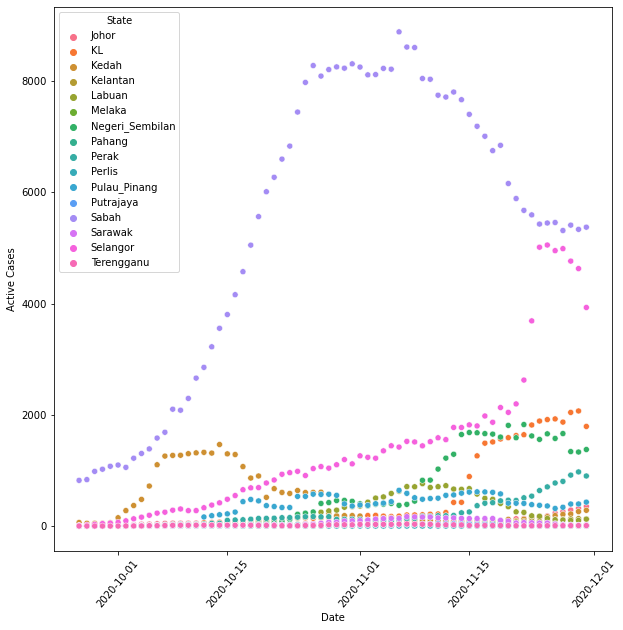

In [22]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.scatterplot(
    data=df_state, x="Date", y = "Active Cases", hue="State", size="size", ax = ax,
    sizes=(20, 200), legend="full"
)
plt.xticks(rotation=50)

16th October:
Kedah has succeeded flatten the Covid-19 Curve as the number of active cases have reduced steadily. The laws imposed by the government to control the spread of infections might have been working.

6th November:\
Sabah recorded the highest active cases in a day with more than 8000. Therefore, 8000 people have gone to quarantine and received treatments.

24th November:\
Selangor’s number of active cases has increased steadily and suddenly spiked with 5000 of infected patients in a day.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

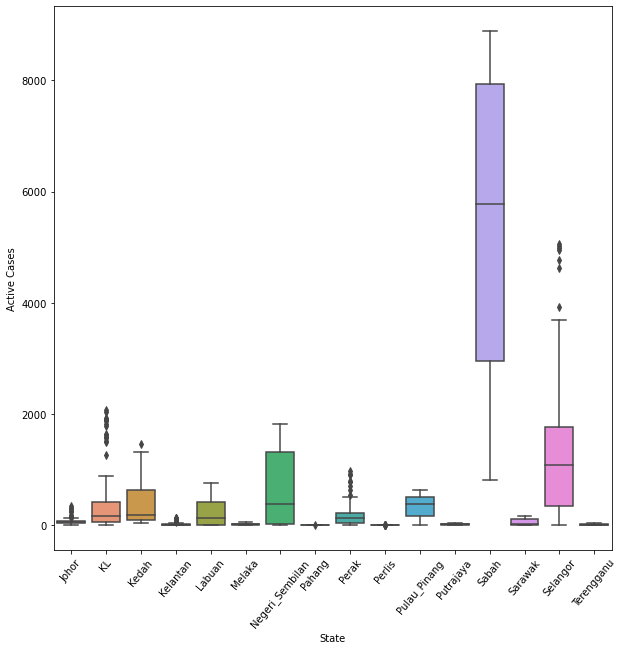

In [24]:
import matplotlib.dates as mdates
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=df_state, x="State", y = "Active Cases")
plt.xticks(rotation=50)

All states besides Sabah has succeeded reached zero number of active cases before 26th September 2020, however, the number increases towards November 2020.

Sabah’s number of active cases increased steadily as there were no outliers detected. However, the lowest value recorded was not zero like any other states, therefore, Sabah might already have infected patients before 26th September.


There were outliers detected in Selangor‘s active cases data. These outliers indicate the sudden spike we have seen in previous graph.


Wordclouds to represent the number of total active cases for states and regions.

#### Wordcloud for states.

In [25]:
df_stateyear = df.groupby([df["Year"], df["State"]])["Active Cases"].sum().reset_index()

In [26]:
df_stateyear

,Year,State,Active Cases
0,2020,Johor,4957
1,2020,KL,32649
2,2020,Kedah,28898
3,2020,Kelantan,1600
4,2020,Labuan,15904
5,2020,Melaka,1350
6,2020,Negeri_Sembilan,39204
7,2020,Pahang,112
8,2020,Perak,14295
9,2020,Perlis,9


In [27]:
df_stateyear["State"] = df_stateyear["State"] + " "

In [28]:
df_stateyear["case"] = df_stateyear["State"]*df_stateyear["Active Cases"]

In [29]:
df_stateyear["case"]

0     Johor Johor Johor Johor Johor Johor Johor Joho...
1     KL KL KL KL KL KL KL KL KL KL KL KL KL KL KL K...
2     Kedah Kedah Kedah Kedah Kedah Kedah Kedah Keda...
3     Kelantan Kelantan Kelantan Kelantan Kelantan K...
4     Labuan Labuan Labuan Labuan Labuan Labuan Labu...
5     Melaka Melaka Melaka Melaka Melaka Melaka Mela...
6     Negeri_Sembilan Negeri_Sembilan Negeri_Sembila...
7     Pahang Pahang Pahang Pahang Pahang Pahang Paha...
8     Perak Perak Perak Perak Perak Perak Perak Pera...
9     Perlis Perlis Perlis Perlis Perlis Perlis Perl...
10    Pulau_Pinang Pulau_Pinang Pulau_Pinang Pulau_P...
11    Putrajaya Putrajaya Putrajaya Putrajaya Putraj...
12    Sabah Sabah Sabah Sabah Sabah Sabah Sabah Saba...
13    Sarawak Sarawak Sarawak Sarawak Sarawak Sarawa...
14    Selangor Selangor Selangor Selangor Selangor S...
15    Terengganu Terengganu Terengganu Terengganu Te...
Name: case, dtype: object

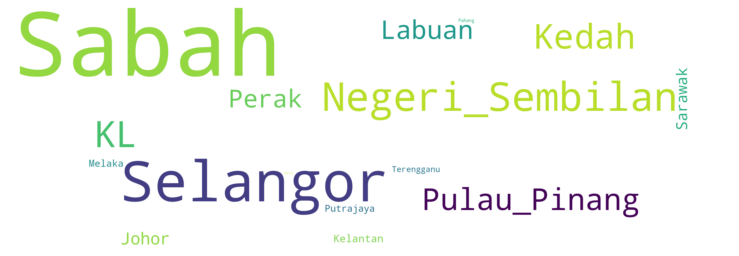

In [30]:
from wordcloud import WordCloud
count = df_stateyear["case"]
wordcloud = WordCloud(max_words=100,width=3000,height=1000, background_color='white', collocations=False).generate(' '.join(count))
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Sabah, Selangor and Negeri Sembilan have recorded the highest number of active cases compared to the others. 

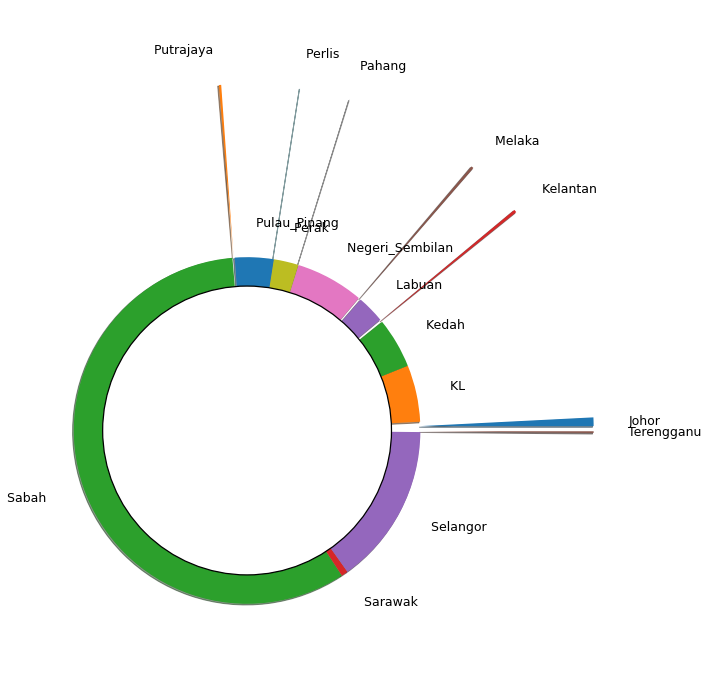

In [39]:
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = df_stateyear["State"]
sizes = df_stateyear["Active Cases"]
#colors = Pastel1_7.hex_colors
explode = (3.0, 0, 0, 3.0, 0, 3.0, 0, 3.0, 0, 3.00, 0, 3.0, 0, 0, 0, 3.0)  # explode a slice if required

figure = plt.pie(sizes, labels=labels, explode = explode, textprops={'fontsize': 12.5},
        shadow=True, radius = 3, labeldistance = 1.2, pctdistance = 0.75)


#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),2.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(10,10)



# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

Sabah has dominated almost half of the total number of active cases then followed by Selangor and Negeri Sembilan. Perlis and Pahang have relatively zero total number of active cases.


#### Wordcloud for region.

In [31]:
df_regionyear = df.groupby([df["Year"], df["Region"]])["Active Cases"].sum().reset_index()

In [32]:
df_regionyear["Region"] = df_regionyear["Region"] + " "

In [33]:
df_regionyear["case"] = df_regionyear["Region"]*df_regionyear["Active Cases"]

In [34]:
df_regionyear["case"]

0      Alor_Gajah Alor_Gajah Alor_Gajah Alor_Gajah Al...
1      Bachok Bachok Bachok Bachok Bachok Bachok Bach...
2      Bagan_Datuk Bagan_Datuk Bagan_Datuk Bagan_Datu...
3      Baling Baling Baling Baling Baling Baling Bali...
4      Bandar_Baharu Bandar_Baharu Bandar_Baharu Band...
                             ...                        
125    Titiwangsa Titiwangsa Titiwangsa Titiwangsa Ti...
126    Tongod Tongod Tongod Tongod Tongod Tongod Tong...
127    Tuaran Tuaran Tuaran Tuaran Tuaran Tuaran Tuar...
128           Tumpat Tumpat Tumpat Tumpat Tumpat Tumpat 
129             Yan Yan Yan Yan Yan Yan Yan Yan Yan Yan 
Name: case, Length: 130, dtype: object

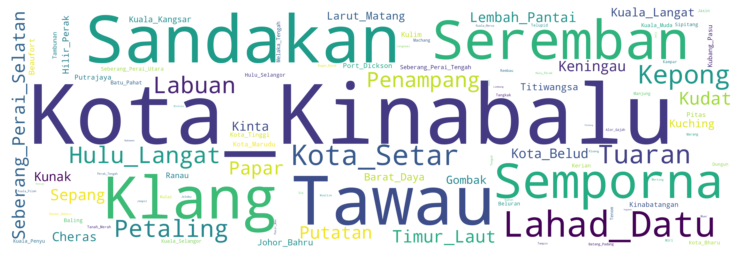

In [35]:
from wordcloud import WordCloud
count = df_regionyear["case"]
wordcloud = WordCloud(max_words=100,width=3000,height=1000, background_color='white', collocations=False).generate(' '.join(count))
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The highest number of active cases in region of:\
Sabah- Kota Kinabalu, Sandakan, Tawau\
Selangor- Hulu Langat\
Negeri Sembilan- Seremban

The overall distribution for number of total active cases for all states.

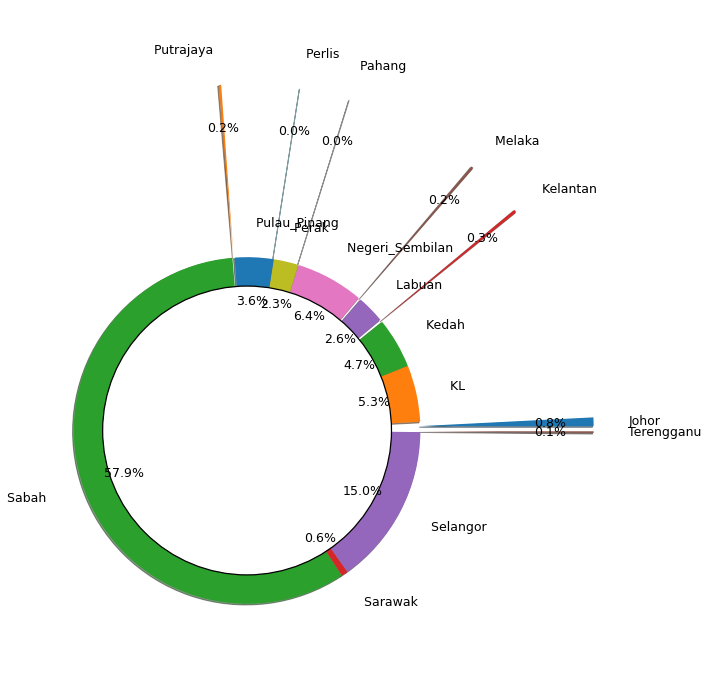

In [38]:
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = df_stateyear["State"]
sizes = df_stateyear["Active Cases"]
#colors = Pastel1_7.hex_colors
explode = (3.0, 0, 0, 3.0, 0, 3.0, 0, 3.0, 0, 3.00, 0, 3.0, 0, 0, 0, 3.0)  # explode a slice if required

figure = plt.pie(sizes, labels=labels, explode = explode, textprops={'fontsize': 12.5},
        autopct='%1.1f%%', shadow=True, radius = 3, labeldistance = 1.2, pctdistance = 0.75)


#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),2.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(10,10)



# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

Sabah has dominated 57.9% of the total active cases while there were no active cases recorded in Perlis and Pahang.
